In [1]:
from glob import glob
subtitles_paths = sorted(glob("../../Subtitles/*.ass"))

In [2]:
subtitles_paths[:5]

['../../Subtitles\\Naruto Season 1 - 01.ass',
 '../../Subtitles\\Naruto Season 1 - 02.ass',
 '../../Subtitles\\Naruto Season 1 - 03.ass',
 '../../Subtitles\\Naruto Season 1 - 04.ass',
 '../../Subtitles\\Naruto Season 1 - 05.ass']

In [3]:
scripts = []
episode_num = []
for path in subtitles_paths:
    
    with open(path,'r') as file:
        lines = file.readlines()
        lines = lines[27:]
    
        rows = [",".join(line.split(',')[9:]) for line in lines]
        
    script = " ".join(rows)
    
    episode = int(path.split('-')[1].split('.')[0].strip())
    
    scripts.append(script)
    episode_num.append(episode)

In [4]:
import pandas as pd
df = pd.DataFrame.from_dict({'episode': episode_num, 'script': scripts})
df.head()

,episode,script
0,1,"A long time ago, a powerful demon fox\Nappeare..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."
2,3,"C'mon!\n Running like a fugitive,\n Being chas..."
3,4,"C'mon!\n Running like a fugitive,\n Being chas..."
4,5,"C'mon!\n Running like a fugitive,\n Being chas..."


In [5]:
def clean_script(script):
    script = script.replace("\\N", ' ')
    script = script.replace("\n", ' ')
    script = script.replace("\"", '')
    return script

df['script'] = df['script'].apply(clean_script)
df.head()

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon! Running like a fugitive, Being chased..."
2,3,"C'mon! Running like a fugitive, Being chased..."
3,4,"C'mon! Running like a fugitive, Being chased..."
4,5,"C'mon! Running like a fugitive, Being chased..."


In [6]:
df.iloc[5]['script']

"C'mon!  Running like a fugitive,  Being chased by something  Inside my heart is pounding  My throat dry like it's withering  For no single one,  To none does belong,  This time is ours, right now...  Unraveling the pain,  Unraveling our hearts,  Unraveling shadows  Stifling our breath,  Reaching for beyond,  Tearing through the dark  In fighting and in love  To the distant light above,  Yes, we are on the way  I wanna rock...  Rockin' my heart  Sasuke here at Point B!  Sakura here at Point C!  Naruto here. I'm at Point A!  You're slow, Naruto!  Okay, the seventh squad…  Hm?!  The target has moved!  Follow it!  Alright! It's over there!  What's your distance from the target?  Five meters! I can go at anytime!  I'm ready, too!  Me, too…!  Okay…  Do it!  Uryaaah!  I got him!  Does he have the ribbon on his right ear…?  Are you sure it's our target Tora?  It's the target, no mistake.  Alright, the mission to capture lost pet Tora is complete!  Isn't there a mission with a greater sense of

In [7]:
import spacy
nlp = spacy.load("en_core_web_trf")

c:\ProgramData\anaconda3\envs\naruto\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\ProgramData\anaconda3\envs\naruto\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\ProgramData\anaconda3\envs\naruto\lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [8]:
doc = nlp("Mark went to Germany")

for ent in doc.ents:
    print(ent.text, ent.label_)

Mark PERSON
Germany GPE


In [13]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def get_ners(script):
    script_sentences = sent_tokenize(script)

    ner_output = []
    
    for sentence in script_sentences:
        doc = nlp(sentence)
        ners = set()
        for ent in doc.ents: 
            if ent.label_=='PERSON':
                full_name = ent.text
                first_name=full_name.split(' ')[0]
                ners.add(first_name)
        ner_output.append(list(ners))
    return ner_output

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


In [14]:
df['ners'] = df['script'].apply(get_ners)

In [22]:
df.head()
df.to_pickle('df.pkl')

In [56]:
window=10
entity_relationship = []

for row in df['ners']:
    previous_entities_in_window = []
    
    for sentence in row:
        previous_entities_in_window.append(sentence)
        previous_entities_in_window = previous_entities_in_window[-10:]
        
        previous_entities_flattened= sum(previous_entities_in_window, [])
        
        for entity in sentence:            
            for entity_in_window in previous_entities_flattened:
                if entity!=entity_in_window:
                    entity_rel = sorted([entity,entity_in_window])
                    entity_relationship.append(entity_rel)

In [57]:
relationship_df = pd.DataFrame({'value':entity_relationship})

In [58]:
relationship_df.head()

,value
0,"[Hokage, Naruto]"
1,"[Hokage, Naruto]"
2,"[Hokage, lruka]"
3,"[Naruto, lruka]"
4,"[Naruto, lruka]"


In [59]:
relationship_df['source'] = relationship_df['value'].apply(lambda x: x[0])
relationship_df['target'] = relationship_df['value'].apply(lambda x: x[1])
relationship_df.head()

,value,source,target
0,"[Hokage, Naruto]",Hokage,Naruto
1,"[Hokage, Naruto]",Hokage,Naruto
2,"[Hokage, lruka]",Hokage,lruka
3,"[Naruto, lruka]",Naruto,lruka
4,"[Naruto, lruka]",Naruto,lruka


In [60]:
relationship_df = relationship_df.groupby(['source','target']).count().reset_index()
relationship_df = relationship_df.sort_values('value',ascending=False)
relationship_df.head()

,source,target,value
2606,Naruto,Sasuke,877
3002,Sakura,Sasuke,459
2599,Naruto,Sakura,404
1395,Hinata,Naruto,358
2833,Orochimaru,Sasuke,279


In [61]:
relationship_df = relationship_df.sort_values('value', ascending=False).reset_index(drop=True)
relationship_df = relationship_df[['source', 'target', 'value']]
relationship_df.to_csv('relationship_df.csv', sep=',', encoding='UTF-8')
relationship_df.head()

,source,target,value
0,Naruto,Sasuke,877
1,Sakura,Sasuke,459
2,Naruto,Sakura,404
3,Hinata,Naruto,358
4,Orochimaru,Sasuke,279


In [62]:
relationship_df = relationship_df.head(200)

In [63]:
import networkx as nx
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

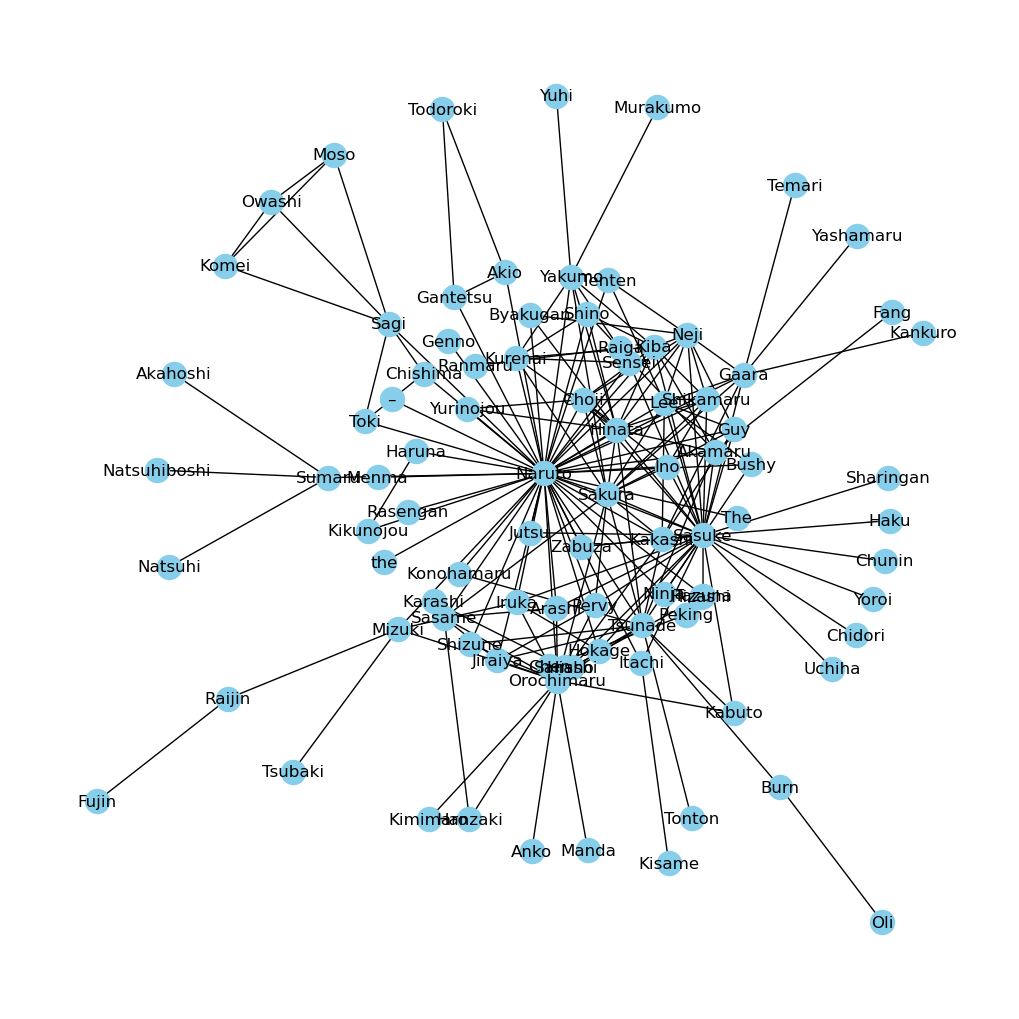

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [45]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("naruto.html")

naruto.html
